# 🎓 Chapter 1: Time-Domain Features

## 🧠 What Are Time-Domain Features?

These features are derived directly from the raw audio waveform as a function of time. They are simple yet powerful for tasks like speech detection, beat tracking, and silence removal.


## 🔍 1. Zero Crossing Rate (ZCR)

### 📐 Theory:

The **Zero Crossing Rate (ZCR)** is the rate at which the signal changes sign:

$$NCR=\frac{1}{N-1}\sum_{n=1}^{N-1}{[(x[n].x[n-1]) < 0]}$$

- $x[n]$ = signal sample at time nn

- $N$ = total number of samples

- $1[⋅]$ is an indicator function (1 if true, else 0)

### 🎯 Use Case:

- Detect percussive sounds, unvoiced speec
- Rhythmic information.

## 🔋 2. Energy and RMS

### 📐 Theory:

**Energy:**

$E=\sum_{n=0}^{N-1}{x[n]^2}$

**RMS Energy:**

$RMS=\sqrt{ \frac{1}{N} \sum_{n=0}^{N-1}{x[n]^2} }$

### 🎯 Use Case:
- Loudness estimation
- Detecting voice activity


### 🐍 Pythonic Implementation & Visualization

### 🧰 Required Libraries

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Frame And Hop Size

In [2]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

### Loading and Playing Soung

In [3]:
y_deb, sr_deb = librosa.load('./audio/debussy.wav')  # Load a trumpet sample
y_duke, sr_duke = librosa.load('./audio/duke.wav')  # Load a trumpet sample
y_redhot, sr_redhot = librosa.load('./audio/redhot.wav')  # Load a trumpet sample

### 🧮 Compute Features

In [4]:
zcr_deb = librosa.feature.zero_crossing_rate(y_deb)[0]
rms_deb = librosa.feature.rms(y=y_deb)[0]

zcr_duke = librosa.feature.zero_crossing_rate(y_duke)[0]
rms_duke = librosa.feature.rms(y=y_duke)[0]

zcr_redhot = librosa.feature.zero_crossing_rate(y_redhot)[0]
rms_redhot = librosa.feature.rms(y=y_redhot)[0]

### 📊 Visualization

**i.. Zero Crossing Rate (ZCR) Interpretation:**
- **High ZCR:** Noisy, unvoiced sounds like "s", "f", "sh", cymbals, etc.
- **Low ZCR:** Voiced, tonal sounds like vowels or sustained notes
- **Example:** A region with many quick sign changes (zigzags) in the waveform will have **high ZCR.**


**ii. RMS Interpretation:**
- **Peaks:** Loud regions (shouts, drum hits, instrument attacks)
- **Dips:** Quiet or silent regions
- Often used for **voice activity detection (VAD)**

In [5]:
frames = range(len(rms_deb))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot For RMS

Text(0.5, 1.0, 'RMS Duke')

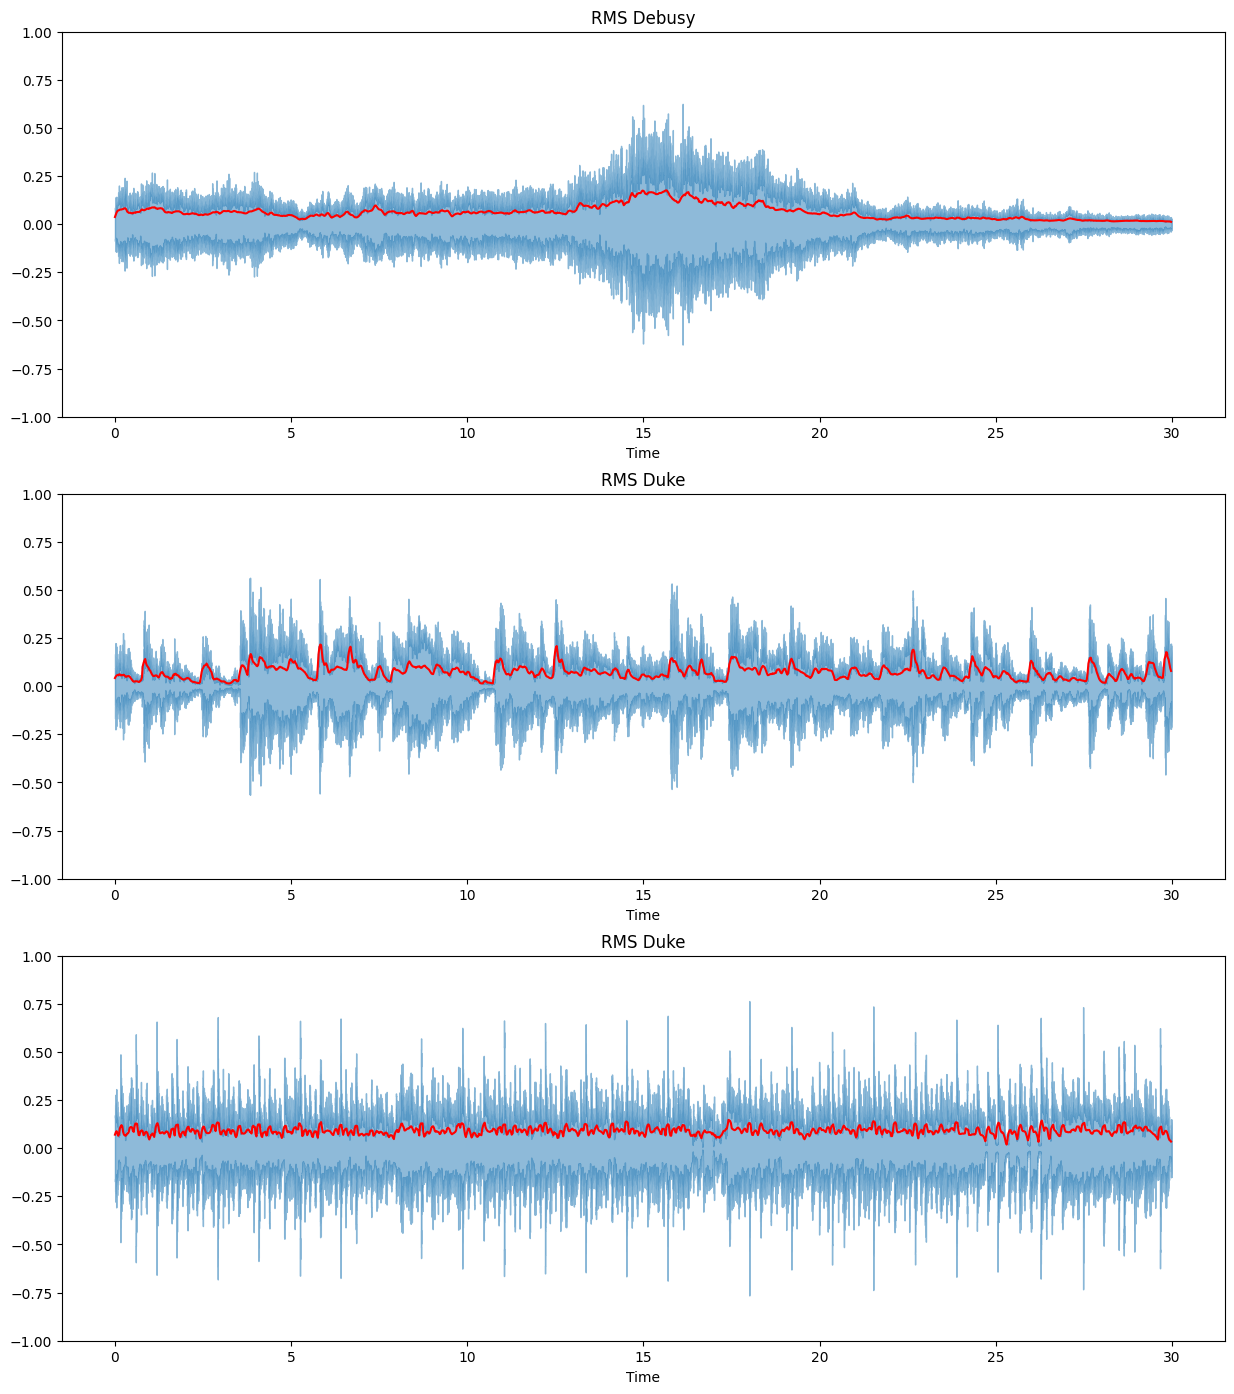

In [6]:

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(y_deb, alpha=0.5)
plt.plot(t, rms_deb, color="r")
plt.ylim(-1, 1)
plt.title("RMS Debusy")


ax = plt.subplot(3, 1, 2)
librosa.display.waveshow(y_duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.ylim(-1, 1)
plt.title("RMS Duke")

ax = plt.subplot(3, 1, 3)
librosa.display.waveshow(y_redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.ylim(-1, 1)
plt.title("RMS Duke")

## Plot For ZCR

Text(0.5, 1.0, 'ZCR Duke')

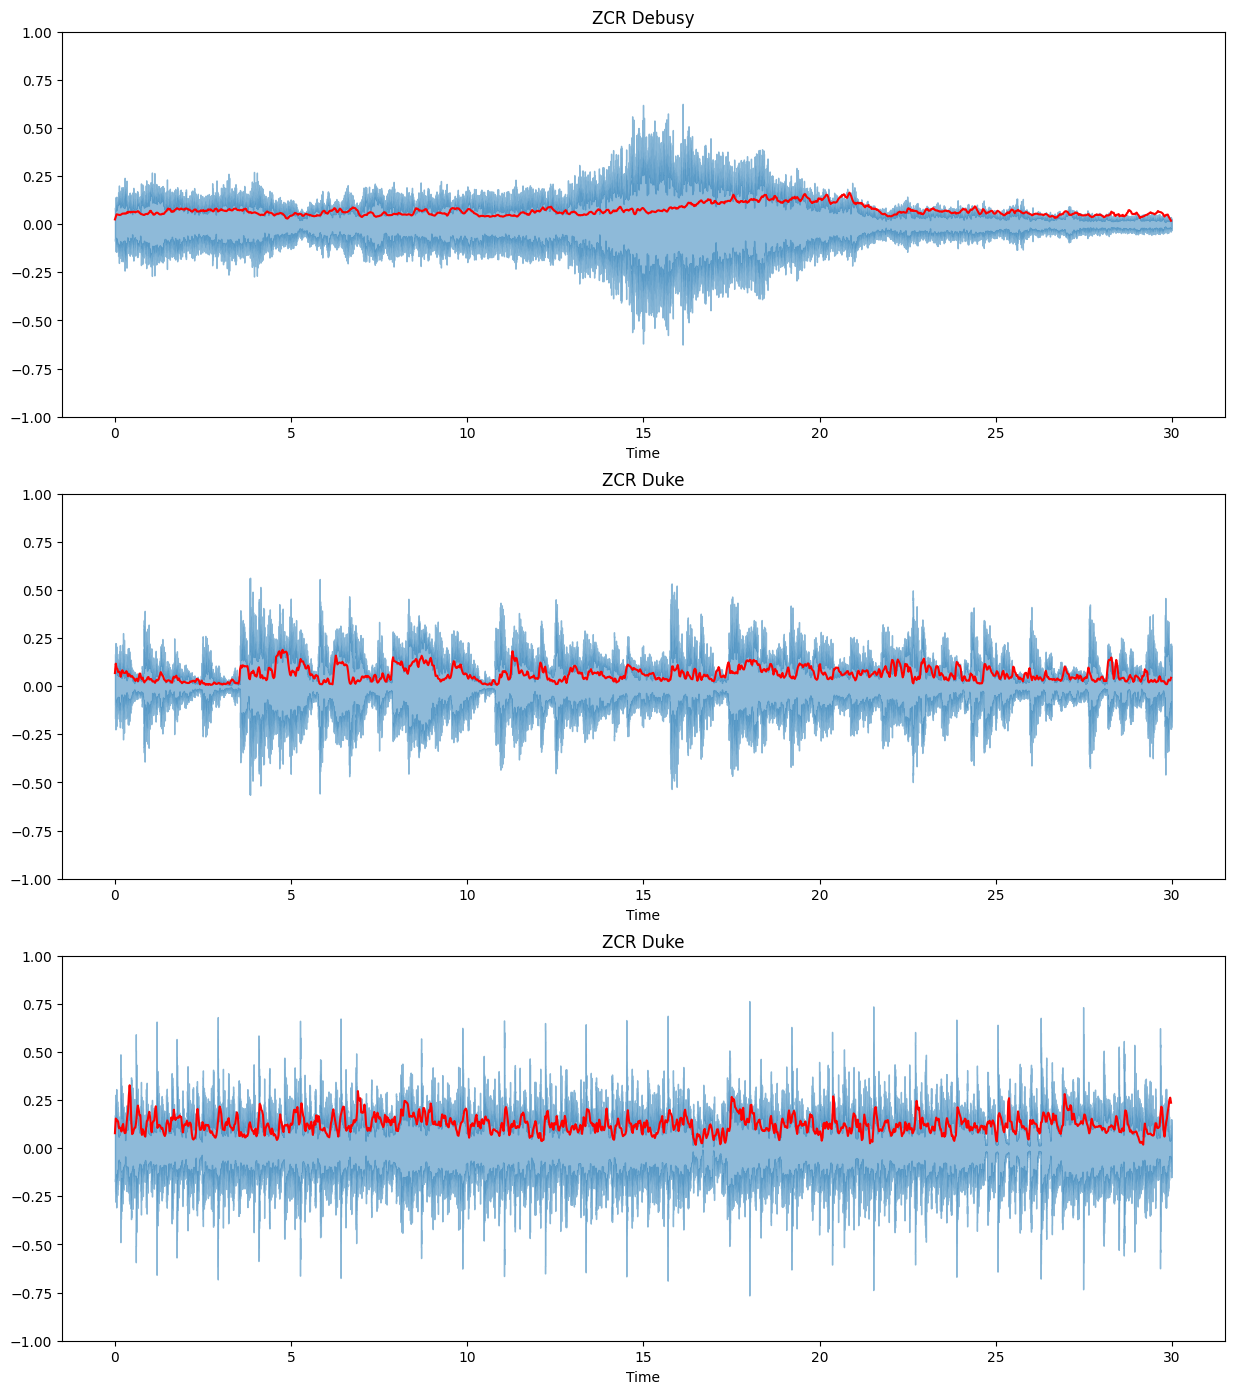

In [7]:
zcr_debussy = librosa.feature.zero_crossing_rate(y_deb, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y_redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y_duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(y_deb, alpha=0.5)
plt.plot(t, zcr_deb, color="r")
plt.ylim(-1, 1)
plt.title("ZCR Debusy")


ax = plt.subplot(3, 1, 2)
librosa.display.waveshow(y_duke, alpha=0.5)
plt.plot(t, zcr_duke, color="r")
plt.ylim(-1, 1)
plt.title("ZCR Duke")

ax = plt.subplot(3, 1, 3)
librosa.display.waveshow(y_redhot, alpha=0.5)
plt.plot(t, zcr_redhot, color="r")
plt.ylim(-1, 1)
plt.title("ZCR Duke")

## 🔔 3. Envelope Detection

### 📐 Theory:

The **envelope** is the smooth curve that outlines the amplitude of a signal.

A simple way to compute it is by:
- Taking the absolute value of the signal
- Applying a low-pass filter or moving average

$Envelope(n) = \frac{1}{W} \sum_{k=n}^{n+2}|{x[k]}|$

Where WW is the smoothing window size.

### 🎯 Use Case:
- Onset/offset detection
- Speech/music segmentation
- Detecting speech pauses

### 🐍 Python Example



### 📊 Visualization

**Interpretation:**
- Tracks **amplitude contour** over time
- Useful for identifying **onsets** (sudden rises) and **offsets**
- Envelopes are more robust to noise than raw waveform

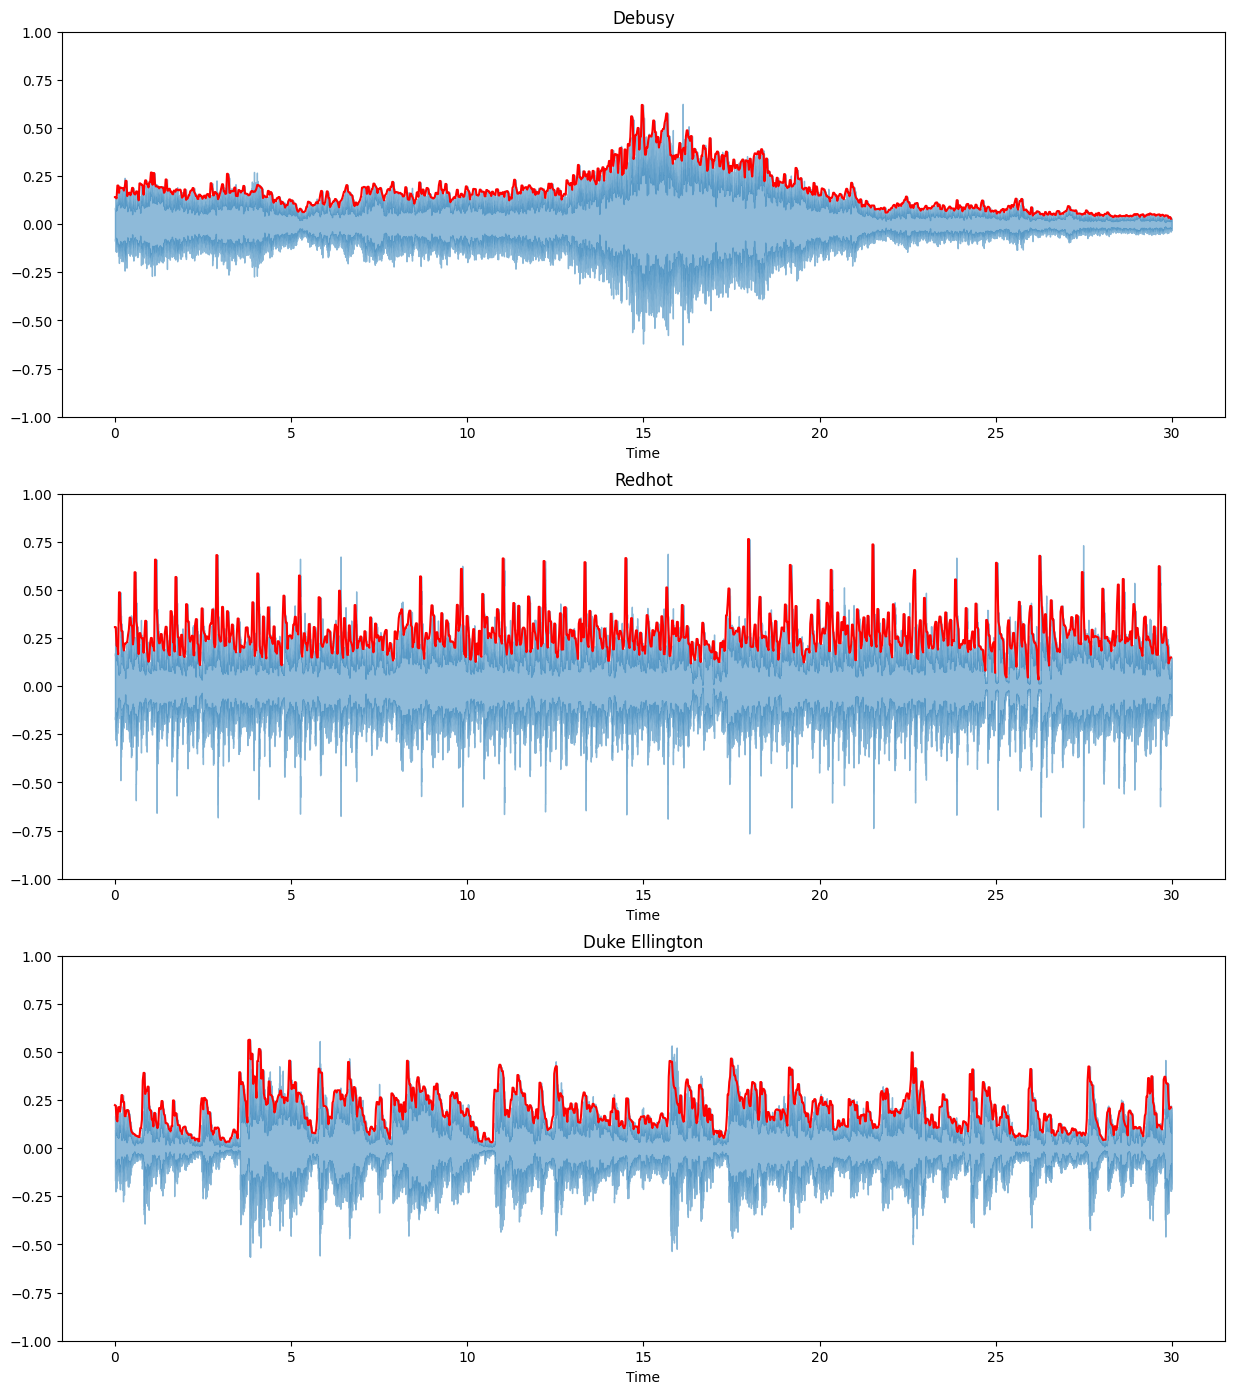

In [8]:
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

ae_debussy = amplitude_envelope(y_deb, FRAME_SIZE, HOP_LENGTH)
ae_redhot = amplitude_envelope(y_redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(y_duke, FRAME_SIZE, HOP_LENGTH)

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(y_deb, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(y_redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("Redhot")

plt.subplot(3, 1, 3)
librosa.display.waveshow(y_duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## 🎯 4. Temporal Centroid

### 📐 Theory:

Temporal centroid is like a “center of gravity” of the signal’s energy over time.

$$t_c= \frac{ \sum_n{t[n].x[n]} } {\sum_n{x[n]^2}} $$


**Where:**
- $t[n]t[n]$: time of sample n
- $x[n]x[n]$: amplitude at time n

### 🐍 Python Code

In [9]:
def get_centroid(data, sr):
    frame_energy = librosa.feature.rms(y=data, hop_length=HOP_LENGTH)[0]

    # Step 2: Get time vector for frames
    frames = np.arange(len(frame_energy))
    times = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_LENGTH)

    # Step 3: Calculate temporal centroid
    numerator = np.sum(times * frame_energy**2)
    denominator = np.sum(frame_energy**2)
    temporal_centroid = numerator / denominator if denominator != 0 else 0

    return temporal_centroid

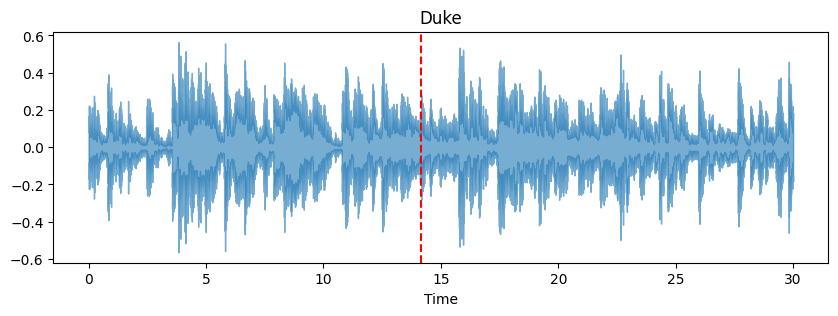

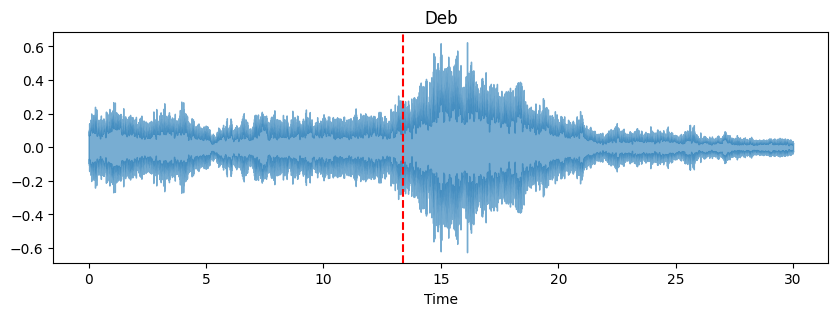

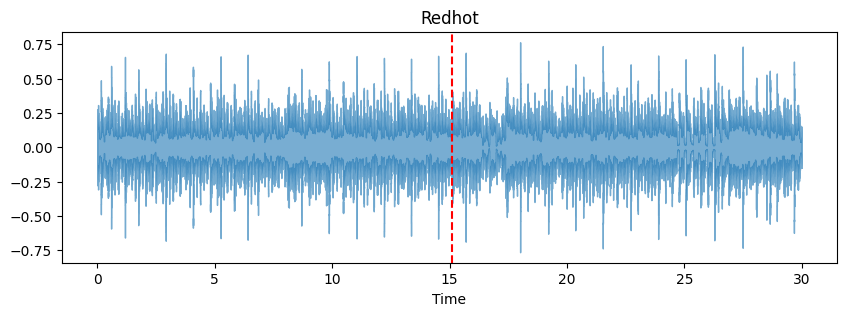

In [10]:

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_duke, alpha=0.6)
plt.axvline(x=get_centroid(y_duke, sr_duke), color='red', linestyle='--', label='Temporal Centroid')
plt.title("Duke")
plt.show()

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_deb, alpha=0.6)
plt.axvline(x=get_centroid(y_deb, sr_deb), color='red', linestyle='--', label='Temporal Centroid')
plt.title("Deb")
plt.show()

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_redhot, alpha=0.6)
plt.axvline(x=get_centroid(y_redhot, sr_redhot), color='red', linestyle='--', label='Temporal Centroid')
plt.title("Redhot")
plt.show()